In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pylab import rcParams 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data Science/master/titanic-train.csv'
titanic = pd.read_csv('train.csv')

titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti cket','Fare','Cabin','E mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch  (Parents/children aboard), and Fare to predict whether a passenger  survived.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [5]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [6]:
titanic.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

### Analysing the distribution of data

In [7]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


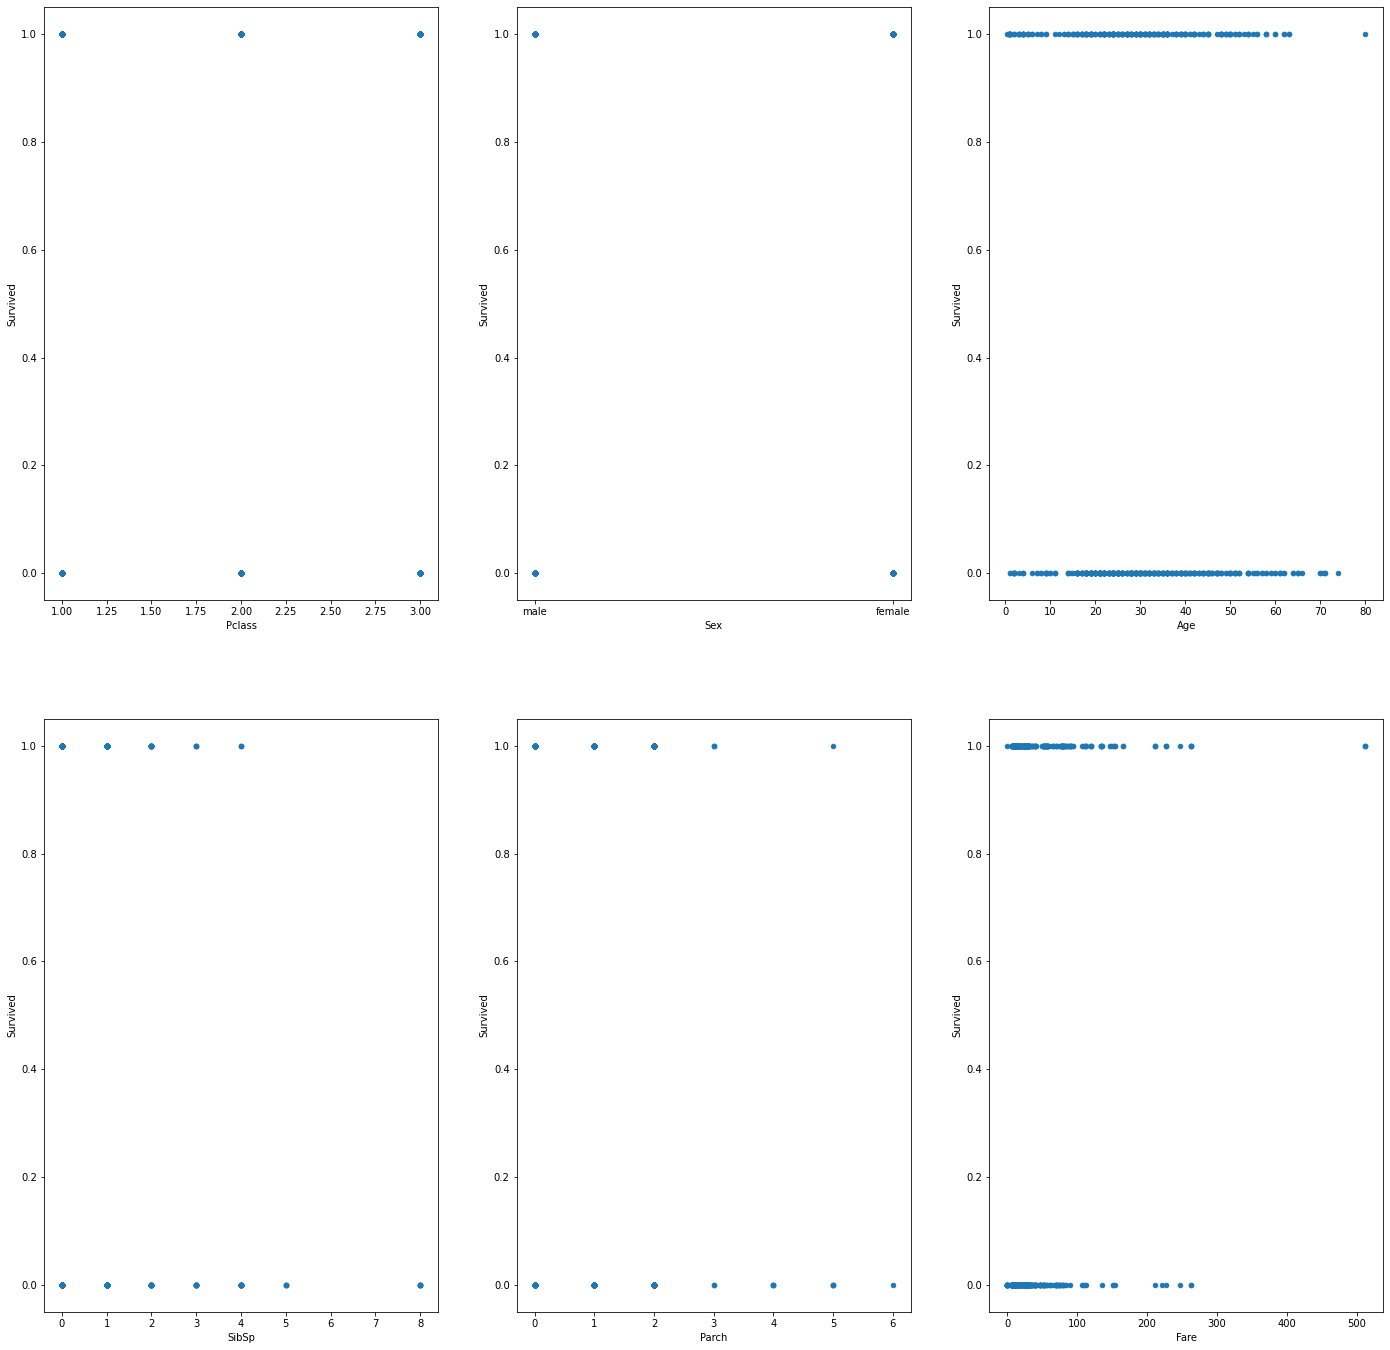

In [9]:
# visualize the relationship between independent variable and the dependent variable using scatterplot
fig, axs = plt.subplots(2, 3, figsize = (24, 24))
# unpack all the axes subplots
axe = axs.ravel()
for i in range(len(titanic.drop(columns='Survived').columns)):
    titanic.plot(kind = 'scatter', x = titanic.columns[i], y = 'Survived', ax = axe[i])
    plt.xlabel(titanic.columns[i])

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


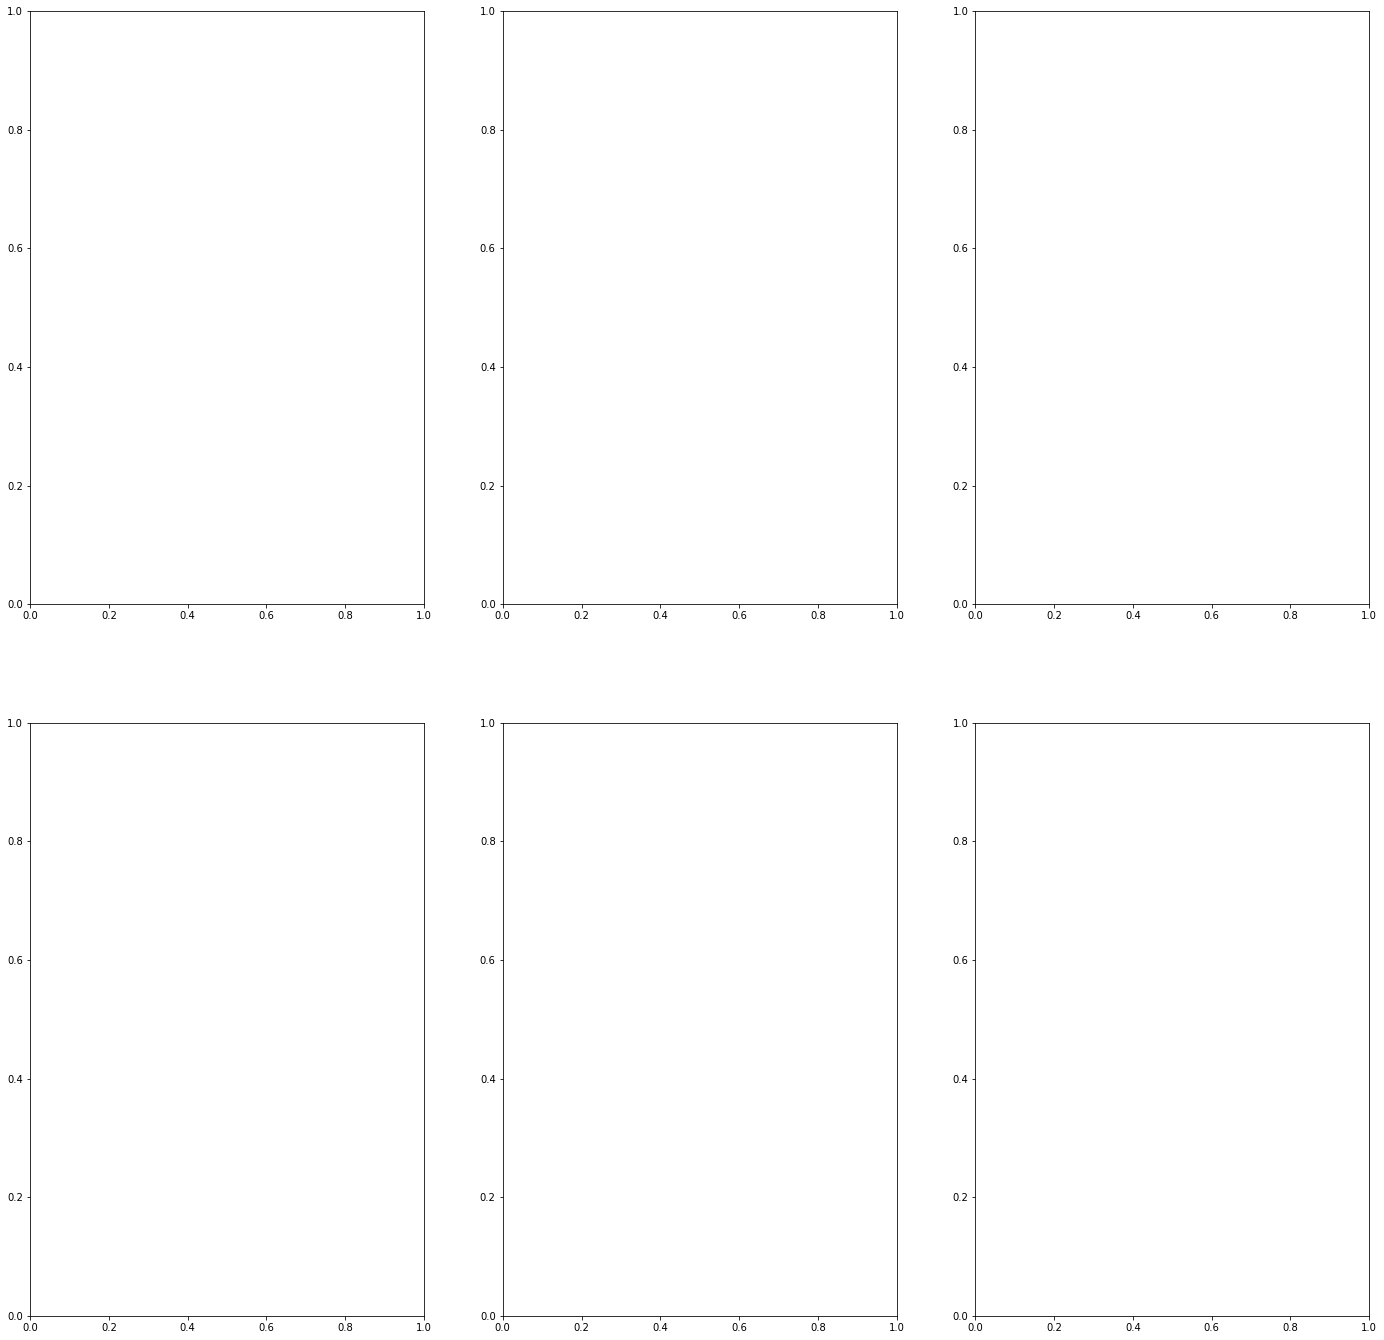

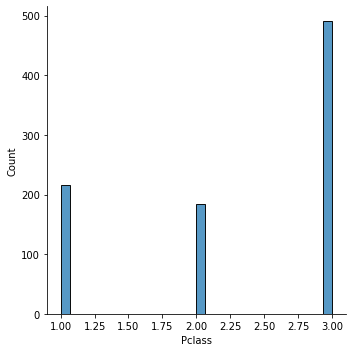

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


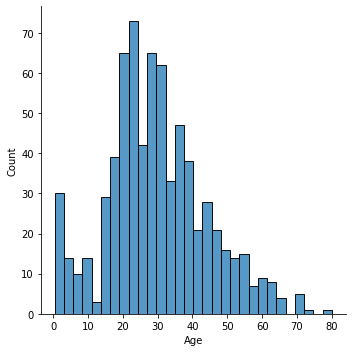

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


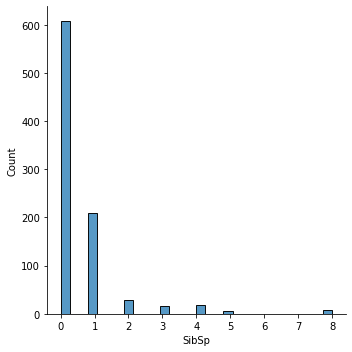

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


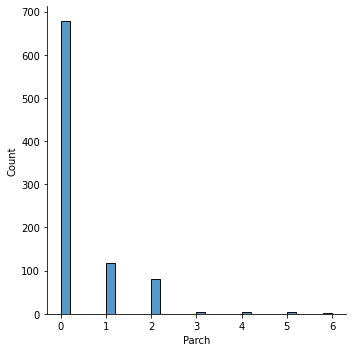

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


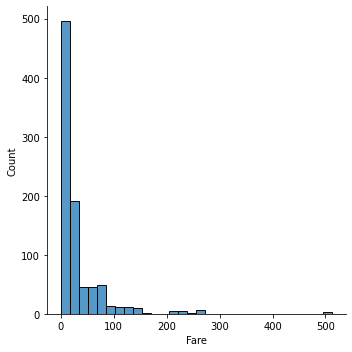

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


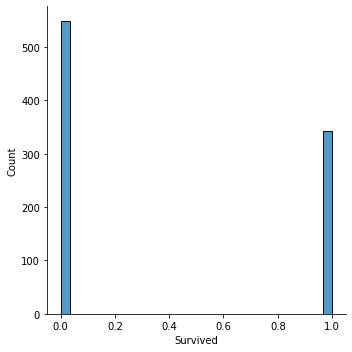

In [10]:
# visualize the distribution of data
fig, axs = plt.subplots(2, 3, figsize = (24, 24))
# unpack all the axes subplots
axe = axs.ravel()
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
for i in range(len(col)):
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.displot(titanic[col[i]], bins=30, ax = axe[i])
    plt.show()

In [11]:
# Fill missing values, as age is almost normally distributed, will replace the values with mean
# titanic[(titanic['Age'].isna()) & (titanic.Sex == 'male')]['Age'] = titanic[titanic.Sex == 'male']['Age'].mean()
# titanic[(titanic['Age'].isna()) & (titanic.Sex == 'female')]['Age'] = titanic[titanic.Sex == 'female']['Age'].mean()

titanic.loc[(titanic.Age.isnull()) & (titanic.Sex=='male'), 'Age'] = titanic.groupby('Sex')['Age'].mean()[1]
titanic.loc[(titanic.Age.isnull()) & (titanic.Sex=='female'), 'Age'] = titanic.groupby('Sex')['Age'].mean()[0]

In [12]:
titanic.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [13]:
titanic.groupby('Sex')['Age'].mean()[1]

30.7266445916115

In [14]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [15]:
# Convert categorical data into numerical
titanic['Sex'] = titanic['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [16]:
X = titanic.drop(columns='Survived')
y = titanic.Survived

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [18]:
#let's first visualize the tree on the data
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
clf.score(x_train,y_train)

0.9865269461077845

In [20]:
y_pred = clf.predict(x_test)

In [21]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7802690582959642

In [22]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7802690582959642

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[114,  25],
       [ 24,  60]], dtype=int64)

In [24]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [25]:
precision = tp/(tp+fp)
precision

0.8201438848920863

In [26]:
recall = tp/(tp+fn)
recall

0.8260869565217391

In [27]:
f1_score = (2*precision*recall)/(precision+recall)
f1_score

0.8231046931407943

In [28]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7672147995889004

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

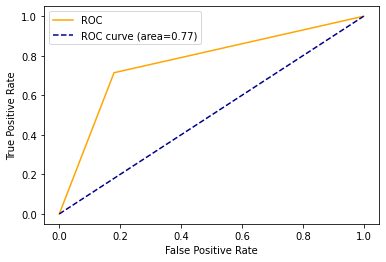

In [30]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Using Grid Search

In [31]:
# we are tuning 5 hyperparameters right now, we are passing the different values for the parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [32]:
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, cv = 5, n_jobs = -1)

In [33]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [34]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [35]:
clf_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 2, min_samples_split = 8, splitter = 'best')
clf_grid.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
clf_grid.score(x_train, y_train)

0.8712574850299402

In [37]:
y_pred_grid = clf_grid.predict(x_test)

In [38]:
# accuracy of our classification tree
clf_grid.score(x_test,y_test)

0.7847533632286996

In [39]:
accuracy = accuracy_score(y_test, y_pred_grid)
accuracy

0.7847533632286996

In [40]:
conf_mat_grid = confusion_matrix(y_test, y_pred_grid)
conf_mat_grid

array([[124,  15],
       [ 33,  51]], dtype=int64)

In [41]:
tp_grid = conf_mat_grid[0][0]
fp_grid = conf_mat_grid[0][1]
fn_grid = conf_mat_grid[1][0]
tn_grid = conf_mat_grid[1][1]

In [42]:
precision_grid = tp_grid/(tp_grid+fp_grid)
precision_grid

0.8920863309352518

In [43]:
recall_grid = tp_grid/(tp_grid+fn_grid)
recall_grid

0.7898089171974523

In [44]:
f1_score_grid = (2*precision_grid*recall_grid)/(precision_grid+recall_grid)
f1_score_grid

0.8378378378378379

In [45]:
auc_grid = roc_auc_score(y_test, y_pred_grid)
auc_grid

0.7496145940390545

In [46]:
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_pred_grid)

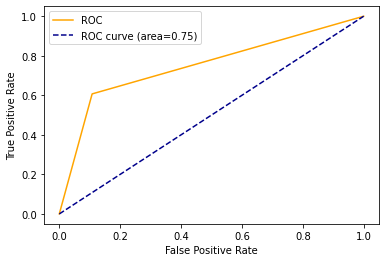

In [47]:
plt.plot(fpr_grid, tpr_grid, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc_grid)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Project Done By: Urvi Gadda

mailto: urvigada96@gmail.com